#Importing Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

#Data Collection

In [7]:
data = {
    'country': ['USA'] * 10 + ['China'] * 10 + ['India'] * 10 + ['Germany'] * 10,
    'year': list(range(2010, 2020)) * 4,
    'gdp': [15000000, 15500000, 16000000, 16500000, 17000000, 17500000, 18000000, 18500000, 19000000, 19500000,
            6000000, 6500000, 7000000, 7500000, 8000000, 8500000, 9000000, 9500000, 10000000, 10500000,
            2000000, 2100000, 2200000, 2300000, 2400000, 2500000, 2600000, 2700000, 2800000, 2900000,
            3000000, 3100000, 3200000, 3300000, 3400000, 3500000, 3600000, 3700000, 3800000, 3900000],
    'population': [309000000, 311000000, 313000000, 315000000, 318000000, 320000000, 322000000, 325000000, 327000000, 330000000,
                   1340000000, 1350000000, 1360000000, 1370000000, 1380000000, 1390000000, 1400000000, 1410000000, 1420000000, 1430000000,
                   1200000000, 1210000000, 1220000000, 1230000000, 1240000000, 1250000000, 1260000000, 1270000000, 1280000000, 1290000000,
                   82000000, 82100000, 82200000, 82300000, 82400000, 82500000, 82600000, 82700000, 82800000, 82900000],
    'energy_consumption': [4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900,
                           8000, 8100, 8200, 8300, 8400, 8500, 8600, 8700, 8800, 8900,
                           3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900,
                           2000, 2100, 2200, 2300, 2400, 2500, 2600, 2700, 2800, 2900],
    'emissions': [5000, 5100, 5200, 5300, 5400, 5500, 5600, 5700, 5800, 5900,
                  10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800, 10900,
                  4000, 4100, 4200, 4300, 4400, 4500, 4600, 4700, 4800, 4900,
                  3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv('carbon_emissions_data.csv', index=False)

#Data Preprocessing

In [8]:
# Load data
data = pd.read_csv('carbon_emissions_data.csv')

# Display first few rows of the data
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Descriptive statistics
print(data.describe())

  country  year       gdp  population  energy_consumption  emissions
0     USA  2010  15000000   309000000                4000       5000
1     USA  2011  15500000   311000000                4100       5100
2     USA  2012  16000000   313000000                4200       5200
3     USA  2013  16500000   315000000                4300       5300
4     USA  2014  17000000   318000000                4400       5400
country               0
year                  0
gdp                   0
population            0
energy_consumption    0
emissions             0
dtype: int64
              year           gdp    population  energy_consumption  \
count    40.000000  4.000000e+01  4.000000e+01            40.00000   
mean   2014.500000  7.850000e+06  7.578625e+08          4700.00000   
std       2.908872  6.019839e+06  5.731339e+08          2324.89316   
min    2010.000000  2.000000e+06  8.200000e+07          2000.00000   
25%    2012.000000  2.975000e+06  2.524750e+08          2975.00000   
50%    20

#Exploratory Data Analysis (EDA)

              year           gdp    population  energy_consumption  \
count    40.000000  4.000000e+01  4.000000e+01            40.00000   
mean   2014.500000  7.850000e+06  7.578625e+08          4700.00000   
std       2.908872  6.019839e+06  5.731339e+08          2324.89316   
min    2010.000000  2.000000e+06  8.200000e+07          2000.00000   
25%    2012.000000  2.975000e+06  2.524750e+08          2975.00000   
50%    2014.500000  4.950000e+06  7.650000e+08          3950.00000   
75%    2017.000000  1.162500e+07  1.302500e+09          5675.00000   
max    2019.000000  1.950000e+07  1.430000e+09          8900.00000   

          emissions  
count     40.000000  
mean    5950.000000  
std     2742.355342  
min     3000.000000  
25%     3975.000000  
50%     4950.000000  
75%     6925.000000  
max    10900.000000  


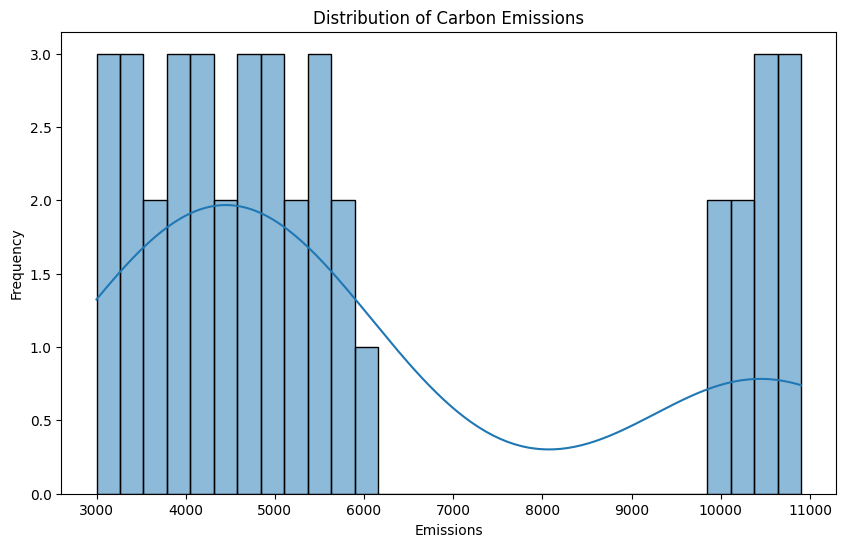

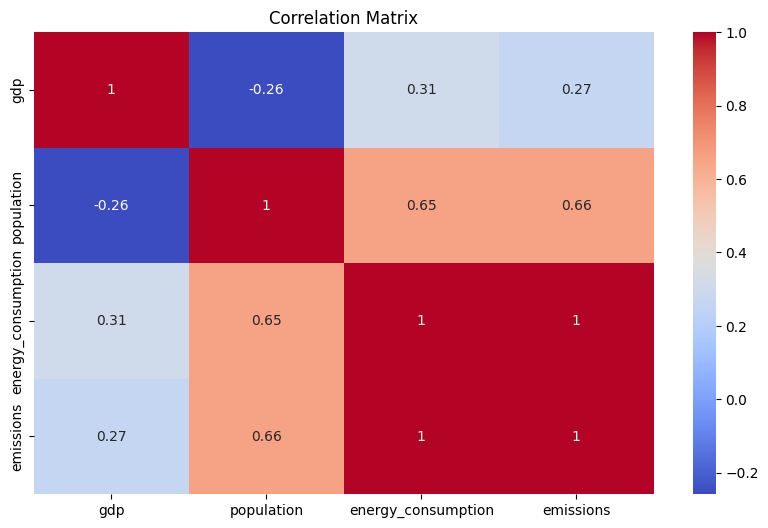

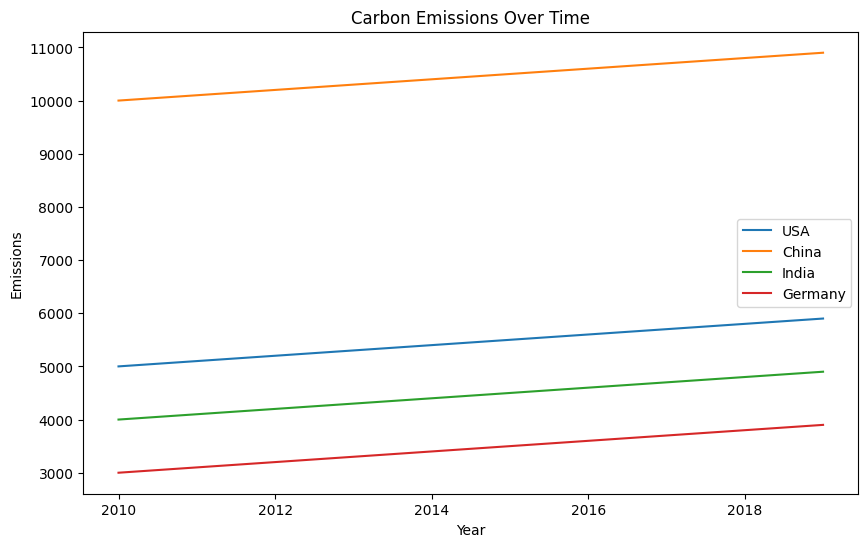

In [9]:
# Descriptive statistics
print(data.describe())

# Visualizations
plt.figure(figsize=(10, 6))
sns.histplot(data['emissions'], bins=30, kde=True)
plt.title('Distribution of Carbon Emissions')
plt.xlabel('Emissions')
plt.ylabel('Frequency')
plt.show()

# Ensure only numeric columns are used for the correlation matrix
numeric_data = data[['gdp', 'population', 'energy_consumption', 'emissions']]
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Time-series plot
plt.figure(figsize=(10, 6))
for country in data['country'].unique():
    subset = data[data['country'] == country]
    plt.plot(subset['year'], subset['emissions'], label=country)
plt.title('Carbon Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.legend()
plt.show()

#Statistical Modeling

In [10]:
# Prepare data for regression
X = data[['gdp', 'population', 'energy_consumption']]  # Example predictors
y = data['emissions']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1316.8785752613833


#Machine Learning

R-squared: 0.9992197752189202


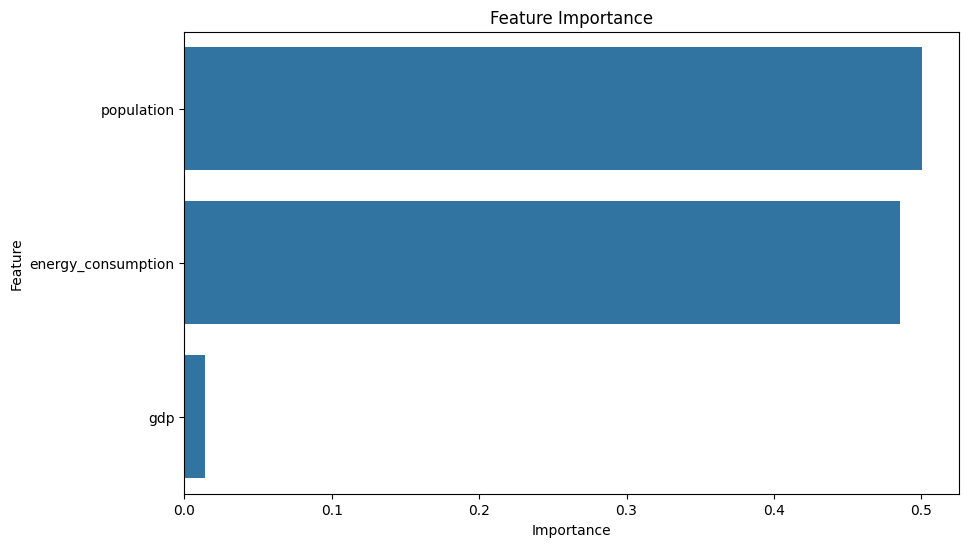

In [11]:
# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

# Feature importance from Random Forest model
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()